# Modelo de predicción de ventas de videojuegos - Proyecto Final Talento Tech IA Curso: Básico

Para este proyecto se pondrá en práctica lo visto durante el curso.

Se hará un modelo de Machine Learning por medio de una clasificación.

* Inicialmente utilizaremos un dataset descargado desde https://www.kaggle.com/datasets

* El dataset a utilizar es el siguiente: https://www.kaggle.com/datasets/willianoliveiragibin/video-game-sales-analyze/data

* Dataset: "*vgsales new.csv*"

* El problema a resolver es: **Modelo de predicción de ventas de videojuegos**

* Variable objetivo: "*Global_Sales*"

Recursos de apoyo:

Streamlit:
*   https://docs.streamlit.io/

Github:
*   https://docs.github.com/es

Youtube:
*   https://www.youtube.com/watch?v=eQMcIGVc8N0






## Instalación e importación de paquetes y librerías

In [ ]:
# Para ello comenzaremos instalando los paquetes de Pyton

!pip install pandas
!pip install seaborn
!pip install scikit-learn
!pip install matplotlib
!pip install xgboost
!pip install --upgrade scikit-learn xgboost
!pip install scikit-learn==1.5.2

  Using cached scikit_learn-1.6.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
Using cached scikit_learn-1.6.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.5 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.2
    Uninstalling scikit-learn-1.5.2:
      Successfully uninstalled scikit-learn-1.5.2
  Using cached scikit_learn-1.5.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.3 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [ ]:
# Continuamos importando las librerias de trabajo

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

## Importación de Dataset

In [ ]:
# Importar dataset (csv)

ruta_csv_original = 'D:\USUARIO Sergio A. Pineda (NO BORRAR)\Desktop\Modelo de predicción de ventas de videojuegos - Proyecto Final Talento Tech IA Curso Básico\Dataset Inicial\vgsales new.csv'

df = pd.read_csv(ruta_csv_original,
                      sep = ',')

In [ ]:
# Tamaño del conjunto de datos

df.shape
print("Cantidad de columnas del dataframe: ", df.shape[1])
print("Cantidad de filas del dataframe: ", df.shape[0])

Cantidad de columnas del dataframe:  11
Cantidad de filas del dataframe:  16598


Este dataset original, cuenta con 11 columnas y 16598 filas.

In [ ]:
# Mostrar el Dataset importado

df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,259,Asteroids,2600,1980.0,Shooter,Atari,4.00,0.26,0.0,0.05,4.31
1,545,Missile Command,2600,1980.0,Shooter,Atari,2.56,0.17,0.0,0.03,2.76
2,1768,Kaboom!,2600,1980.0,Misc,Activision,1.07,0.07,0.0,0.01,1.15
3,1971,Defender,2600,1980.0,Misc,Atari,0.99,0.05,0.0,0.01,1.05
4,2671,Boxing,2600,1980.0,Fighting,Activision,0.72,0.04,0.0,0.01,0.77


In [ ]:
# Definir cantidad de valores únicos de la variable objetivo

len(df['Global_Sales'].unique())

623

Encontramos que la variable objetivo contiene 623 categorías diferentes.

In [ ]:
# Ordenar el dataset en orden según la variable Global_Sales

df = df.sort_values(by='Global_Sales')

df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
8298,16384,Hoshigami: Ruining Blue Earth Remix,DS,2007.0,Role-Playing,505 Games,0.00,0.00,0.01,0.0,0.01
9689,16049,Blitzkrieg 2 Anthology,PC,2008.0,Strategy,Ascaron Entertainment GmbH,0.00,0.01,0.00,0.0,0.01
9688,16041,Totally Spies! Totally Party,PS2,2008.0,Misc,Ubisoft,0.01,0.01,0.00,0.0,0.01
9687,16036,NiGHTS into dreams...,PS2,2008.0,Platform,Sega,0.00,0.00,0.01,0.0,0.01
9686,16033,My Little Baby,DS,2008.0,Simulation,CDV Software Entertainment,0.00,0.01,0.00,0.0,0.01


In [ ]:
# Observamos si hay datos nulos

df.isnull().sum()

,0
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [ ]:
# Porcentajes de datos nulos

(df.isnull().sum()/df.shape[0])*100

,0
Rank,0.000000
Name,0.000000
Platform,0.000000
Year,1.632727
Genre,0.000000
Publisher,0.349440
NA_Sales,0.000000
EU_Sales,0.000000
JP_Sales,0.000000
Other_Sales,0.000000


### **Criterios para borrar columnas como un primer acercamiento a un modelo:**

* Columnas con un porcentaje mayor al 40% de datos nulos las borramos.
* Columnas con más del 90% con un único valor las borramos.
* Columnas con más del 90% de valores únicos las borramos siempre y cuando no sean numéricas.

### Análisis inicial

De acuerdo con el análisis inicial del dataset, este no cumple con ninguno de los criterios para eliminar alguna de las columnas dado que solo dos columnas "Year" y "Publisher" contienen datos nulos pero que representan el 1,63% y 0,35% cada columna aproximadamente.

Sin embargo, podemos eliminar las filas en donde hay datos nulos, dado que el modelo no puede tener datos nulos.

## Preprocesamiento de datos

### Eliminación de filas con datos nulos

In [ ]:
# Eliminar las filas con datos nulos

df_sin_nulos = df.dropna(subset=['Year', 'Publisher'])

In [ ]:
# Verificar si hay datos nulos

df_sin_nulos.isnull().sum()

,0
Rank,0
Name,0
Platform,0
Year,0
Genre,0
Publisher,0
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


Evidenciamos que ya no hay datos nulos. Ahora verificamos cómo queda el tamaño del dataframe sin los datos nulos.

In [ ]:
# Tamaño del conjunto de datos sin datos nulos

df_sin_nulos.shape
print("Cantidad de columnas del dataframe: ", df_sin_nulos.shape[1])
print("Cantidad de filas del dataframe: ", df_sin_nulos.shape[0])

Cantidad de columnas del dataframe:  11
Cantidad de filas del dataframe:  16291


En este dataframe actual, pasó de haber 16598 filas del dataset original a tener 16291 filas, hubo una reducción del 1,85% de las filas.

In [ ]:
# Mostrar de nuevo el Dataset

df_sin_nulos.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
8298,16384,Hoshigami: Ruining Blue Earth Remix,DS,2007.0,Role-Playing,505 Games,0.00,0.00,0.01,0.0,0.01
9689,16049,Blitzkrieg 2 Anthology,PC,2008.0,Strategy,Ascaron Entertainment GmbH,0.00,0.01,0.00,0.0,0.01
9688,16041,Totally Spies! Totally Party,PS2,2008.0,Misc,Ubisoft,0.01,0.01,0.00,0.0,0.01
9687,16036,NiGHTS into dreams...,PS2,2008.0,Platform,Sega,0.00,0.00,0.01,0.0,0.01
9686,16033,My Little Baby,DS,2008.0,Simulation,CDV Software Entertainment,0.00,0.01,0.00,0.0,0.01


### Convertir las variables categóricas a variables númericas

In [ ]:
# Inicialmente, identificamos los tipos de variables del dataset

df_sin_nulos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 8298 to 6113
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Las variables de tipo "object" se deberán convertir a variables númericas.

In [ ]:
# Convertir las columnas de variables "Categóricas" a "Númericas"

le = LabelEncoder()

df_sin_nulos['Name'] = le.fit_transform(df_sin_nulos['Name'])
df_sin_nulos['Platform'] = le.fit_transform(df_sin_nulos['Platform'])
df_sin_nulos['Genre'] = le.fit_transform(df_sin_nulos['Genre'])
df_sin_nulos['Publisher'] = le.fit_transform(df_sin_nulos['Publisher'])

print(df_sin_nulos)

       Rank   Name  Platform    Year  Genre  Publisher  NA_Sales  EU_Sales  \
8298  16384   4107         4  2007.0      7          6      0.00      0.00   
9689  16049    889        13  2008.0     11         46      0.00      0.01   
9688  16041  10265        16  2008.0      3        524      0.01      0.01   
9687  16036   6642        16  2008.0      4        445      0.00      0.00   
9686  16033   6159         4  2008.0      9         82      0.00      0.01   
...     ...    ...       ...     ...    ...        ...       ...       ...   
705       5   7247         5  1996.0      7        359     11.27      8.89   
9751      4  10851        26  2009.0     10        359     15.75     11.01   
8323      3   5493        26  2008.0      6        359     15.85     12.88   
122       2   9201        11  1985.0      4        359     29.08      3.58   
6113      1  10849        26  2006.0     10        359     41.49     29.02   

      JP_Sales  Other_Sales  Global_Sales  
8298      0.01     

<ipython-input-388-59b958080129>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sin_nulos['Name'] = le.fit_transform(df_sin_nulos['Name'])
<ipython-input-388-59b958080129>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sin_nulos['Platform'] = le.fit_transform(df_sin_nulos['Platform'])
<ipython-input-388-59b958080129>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [ ]:
# Mostrar de nuevo el Dataset convertido

df_sin_nulos.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
8298,16384,4107,4,2007.0,7,6,0.00,0.00,0.01,0.0,0.01
9689,16049,889,13,2008.0,11,46,0.00,0.01,0.00,0.0,0.01
9688,16041,10265,16,2008.0,3,524,0.01,0.01,0.00,0.0,0.01
9687,16036,6642,16,2008.0,4,445,0.00,0.00,0.01,0.0,0.01
9686,16033,6159,4,2008.0,9,82,0.00,0.01,0.00,0.0,0.01


In [ ]:
# Verificar de nuevo los tipos de variables

df_sin_nulos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 8298 to 6113
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  int64  
 2   Platform      16291 non-null  int64  
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  int64  
 5   Publisher     16291 non-null  int64  
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(5)
memory usage: 1.5 MB


In [ ]:
# Confirmar las variables numéricas

var_num = df_sin_nulos.select_dtypes(include=['int64', 'float64']).columns
var_num

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [ ]:
# Definimos la correlación de los datos frente a la variable 'Global_Sales'

df_sin_nulos[var_num].corr()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,-0.013871,-0.085270,0.178027,-0.055518,-0.023116,-0.400315,-0.379137,-0.269323,-0.332735,-0.426975
Name,-0.013871,1.000000,0.011886,-0.001271,-0.004253,0.026643,0.012567,0.006517,0.015869,-0.007089,0.010973
Platform,-0.085270,0.011886,1.000000,0.167648,0.026665,-0.017938,0.041976,0.046748,-0.079621,0.054493,0.027929
Year,0.178027,-0.001271,0.167648,1.000000,-0.125366,0.029802,-0.091285,0.006108,-0.169387,0.041128,-0.074647
Genre,-0.055518,-0.004253,0.026665,-0.125366,1.000000,-0.051176,0.018057,0.017005,0.030304,0.009802,0.022215
Publisher,-0.023116,0.026643,-0.017938,0.029802,-0.051176,1.000000,0.005370,0.013237,0.053019,0.014569,0.019368
NA_Sales,-0.400315,0.012567,0.041976,-0.091285,0.018057,0.005370,1.000000,0.768923,0.451283,0.634518,0.941269
EU_Sales,-0.379137,0.006517,0.046748,0.006108,0.017005,0.013237,0.768923,1.000000,0.436379,0.726256,0.903264
JP_Sales,-0.269323,0.015869,-0.079621,-0.169387,0.030304,0.053019,0.451283,0.436379,1.000000,0.290559,0.612774
Other_Sales,-0.332735,-0.007089,0.054493,0.041128,0.009802,0.014569,0.634518,0.726256,0.290559,1.000000,0.747964


De acuerdo con la tabla de correlaciones, vemos que las variables 'NA_Sales' y 'EU_Sales' están fuertemente correlacionadas respecto a la variable objetivo definida ('Global_Sales'). Ahora procederemos a eliminar estás columnas.

### Eliminación de columnas con alta correlación y las variables categóricas

In [ ]:
# Eliminar las columnas de las varibles 'NA_Sales' y 'EU_Sales' que tienen altacorrelación y las columnas 'Name', 'Platform', 'Genre' y ' Publisher' que son variables categóricas

df_2 = df_sin_nulos.drop(columns=['NA_Sales', 'EU_Sales', 'Name', 'Platform', 'Genre', 'Publisher'])

In [ ]:
# Tamaño del conjunto de datos sin datos nulos

df_2.shape
print("Cantidad de columnas del dataframe: ", df_2.shape[1])
print("Cantidad de filas del dataframe: ", df_2.shape[0])

Cantidad de columnas del dataframe:  5
Cantidad de filas del dataframe:  16291


In [ ]:
# Mostrar el Dataset final

df_2.head()

,Rank,Year,JP_Sales,Other_Sales,Global_Sales
8298,16384,2007.0,0.01,0.0,0.01
9689,16049,2008.0,0.00,0.0,0.01
9688,16041,2008.0,0.00,0.0,0.01
9687,16036,2008.0,0.01,0.0,0.01
9686,16033,2008.0,0.00,0.0,0.01


A partir de este punto, para optimizar el modelo, se eliminan las columnas que son categóricas y las columnas que tienen una alta correlación frente a la variable objetivo 'Global_Sales'.

### Eliminamos valores atípicos

In [ ]:
# Calcular Q1, Q3 e IQR

Q1 = df_2['Global_Sales'].quantile(0.25)
Q3 = df_2['Global_Sales'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
# Definir los límites inferior y superior

lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

In [ ]:
# Filtrar los valores dentro de estos límites

df_final = df_2[(df_2['Global_Sales'] >= lim_inf) & (df_2['Global_Sales'] <= lim_sup)]

df_final.head()

,Rank,Year,JP_Sales,Other_Sales,Global_Sales
8298,16384,2007.0,0.01,0.0,0.01
9689,16049,2008.0,0.00,0.0,0.01
9688,16041,2008.0,0.00,0.0,0.01
9687,16036,2008.0,0.01,0.0,0.01
9686,16033,2008.0,0.00,0.0,0.01


In [ ]:
# Tamaño del conjunto de datos finales

df_final.shape
print("Cantidad de columnas del dataframe: ", df_final.shape[1])
print("Cantidad de filas del dataframe: ", df_final.shape[0])

Cantidad de columnas del dataframe:  5
Cantidad de filas del dataframe:  14465


En este dataframe final, pasó de haber 16598 filas del dataset original a tener 14465 filas, hubo una reducción del 12,85% de las filas.

### Dividir el dataset en un conjunto de entrenamiento y de testeo

Como parte de la actividad, se realizarán dos modelos, uno sin los valores atípicos y el otro teniendo en cuenta estos valores atípicos.

In [ ]:
# Separar las características (X) y las etiquetas (y)

X = df_final.drop('Global_Sales', axis=1)
y = df_final['Global_Sales']

In [ ]:
# Separar las características (X) y las etiquetas (y) del segundo modelo

X = df_2.drop('Global_Sales', axis=1)
y = df_2['Global_Sales']

In [ ]:
# Dividir en conjunto de entrenamiento y conjunto de testeo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Dividir en conjunto de entrenamiento y conjunto de testeo del segundo modelo

X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Verificar la separación de conjuntos

print("Tamaño de train:", X_train.shape)
print("Tamaño de test:", X_test.shape)

Tamaño de train: (11572, 4)
Tamaño de test: (2893, 4)


In [ ]:
# Verificar la separación de conjuntos del segundo modelo

print("Tamaño de train:", X_2_train.shape)
print("Tamaño de test:", X_2_test.shape)

Tamaño de train: (13032, 4)
Tamaño de test: (3259, 4)


## Prueba de los modelos

### En este punto definimos los modelos.

In [ ]:
# Definir el modelo

xgb_model = XGBRegressor(
    n_estimators=100,    # Número de árboles
    learning_rate=0.1,   # Tasa de aprendizaje
    max_depth=6,         # Profundidad máxima del árbol
    random_state=42
)

In [ ]:
# Definir el modelo con valores atipicos (segundo modelo)

xgb_model_2 = XGBRegressor(
    n_estimators=100,    # Número de árboles
    learning_rate=0.1,   # Tasa de aprendizaje
    max_depth=6,         # Profundidad máxima del árbol
    random_state=42
)

### Ahora se procede en entrenar los modelos.

In [ ]:
# Entrenar el modelo

xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Entrenar el segundo modelo

xgb_model_2.fit(X_2_train, y_2_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

### Seguidamente se realizan las predicciones de los modelos.

In [ ]:
# Predecir el conjunto de prueba

y_pred = xgb_model.predict(X_test)

In [ ]:
# Predecir el conjunto de prueba del segundo modelo

y_2_pred = xgb_model_2.predict(X_2_test)

In [ ]:
# Añadir las predicciones al DataFrame (opcional)

X_test['predicciones'] = y_pred

In [ ]:
# Añadir las predicciones al DataFrame del segundo modelo (opcional)

X_2_test['predicciones'] = y_2_pred

## Gráficas de los modelos

### Se gráfican las predicciones comparando las variables JP_Sales vs Global_Sales

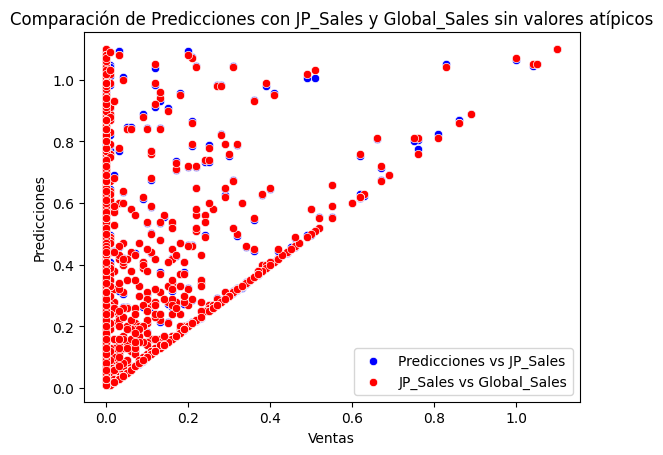

In [ ]:
# Graficar las Predicciones comparando las variables JP_Sales vs Global_Sales sin valores atipicos

# Graficar JP_Sales vs Predicciones
sns.scatterplot(x = X_test['JP_Sales'], y = y_pred, label='Predicciones vs JP_Sales', color='blue')

# Graficar JP_Sales vs Global_Sales
sns.scatterplot(x = X_test['JP_Sales'], y = y_test, label='JP_Sales vs Global_Sales', color='red')

# Añadir etiquetas y título
plt.title('Comparación de Predicciones con JP_Sales y Global_Sales sin valores atípicos')
plt.xlabel('Ventas')
plt.ylabel('Predicciones')
plt.legend()

# Mostrar el gráfico
plt.show()

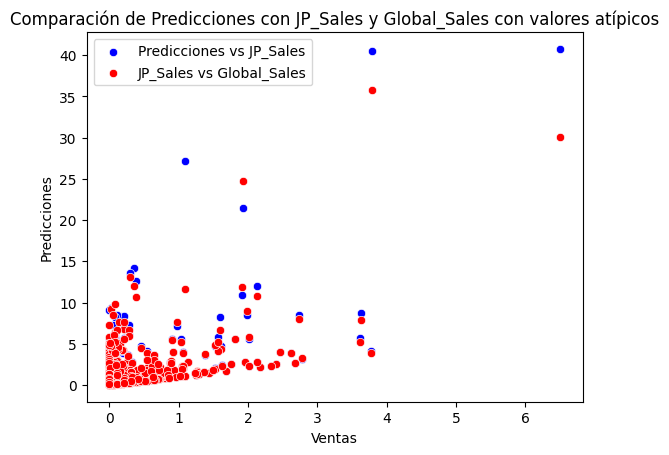

In [ ]:
# Graficar las Predicciones comparando las variables JP_Sales vs Global_Sales del segundo modelo con valores atipicos

# Graficar JP_Sales vs Predicciones
sns.scatterplot(x = X_2_test['JP_Sales'], y = y_2_pred, label='Predicciones vs JP_Sales', color='blue')

# Graficar JP_Sales vs Global_Sales
sns.scatterplot(x = X_2_test['JP_Sales'], y = y_2_test, label='JP_Sales vs Global_Sales', color='red')

# Añadir etiquetas y título
plt.title('Comparación de Predicciones con JP_Sales y Global_Sales con valores atípicos')
plt.xlabel('Ventas')
plt.ylabel('Predicciones')
plt.legend()

# Mostrar el gráfico
plt.show()

### Se gráfican las predicciones comparando las variables Other_Sales vs Global_Sales

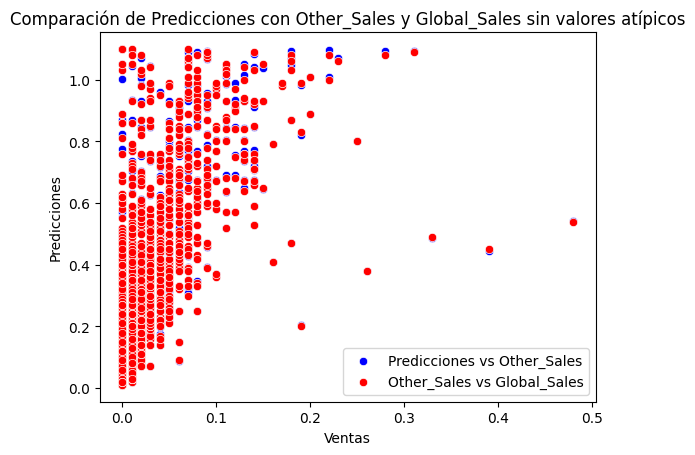

In [ ]:
# Graficar las Predicciones comparando las variables Other_Sales vs Global_Sales sin valores atipicos

# Graficar Other_Sales vs Predicciones
sns.scatterplot(x = X_test['Other_Sales'], y = y_pred, label='Predicciones vs Other_Sales', color='blue')

# Graficar Other_Sales vs Global_Sales
sns.scatterplot(x = X_test['Other_Sales'], y = y_test, label='Other_Sales vs Global_Sales', color='red')

# Añadir etiquetas y título
plt.title('Comparación de Predicciones con Other_Sales y Global_Sales sin valores atípicos')
plt.xlabel('Ventas')
plt.ylabel('Predicciones')
plt.legend()

# Mostrar el gráfico
plt.show()

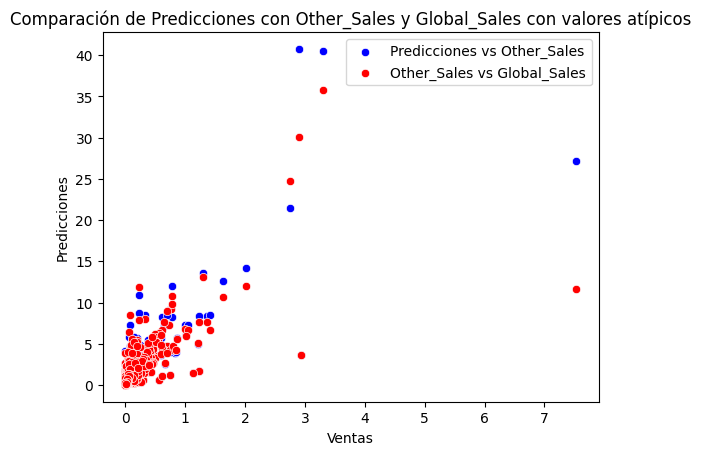

In [ ]:
# Graficar las Predicciones comparando las variables Other_Sales vs Global_Sales del segundo modelo con valores atipicos

# Graficar Other_Sales vs Predicciones
sns.scatterplot(x = X_2_test['Other_Sales'], y = y_2_pred, label='Predicciones vs Other_Sales', color='blue')

# Graficar Other_Sales vs Global_Sales
sns.scatterplot(x = X_2_test['Other_Sales'], y = y_2_test, label='Other_Sales vs Global_Sales', color='red')

# Añadir etiquetas y título
plt.title('Comparación de Predicciones con Other_Sales y Global_Sales con valores atípicos')
plt.xlabel('Ventas')
plt.ylabel('Predicciones')
plt.legend()

# Mostrar el gráfico
plt.show()

### Se gráfican las predicciones comparando las variables Year vs Global_Sales

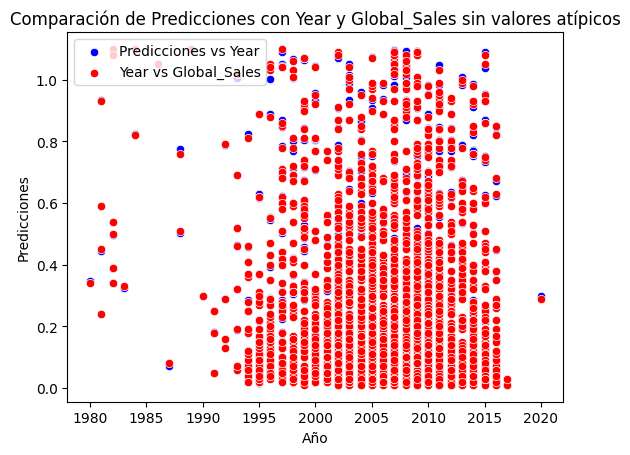

In [ ]:
# Graficar las Predicciones comparando las variables Year vs Global_Sales sin valores atipicos

# Graficar Year vs Predicciones
sns.scatterplot(x = X_test['Year'], y = y_pred, label='Predicciones vs Year', color='blue')

# Graficar Year vs Global_Sales
sns.scatterplot(x = X_test['Year'], y = y_test, label='Year vs Global_Sales', color='red')

# Añadir etiquetas y título
plt.title('Comparación de Predicciones con Year y Global_Sales sin valores atípicos')
plt.xlabel('Año')
plt.ylabel('Predicciones')
plt.legend()

# Mostrar el gráfico
plt.show()

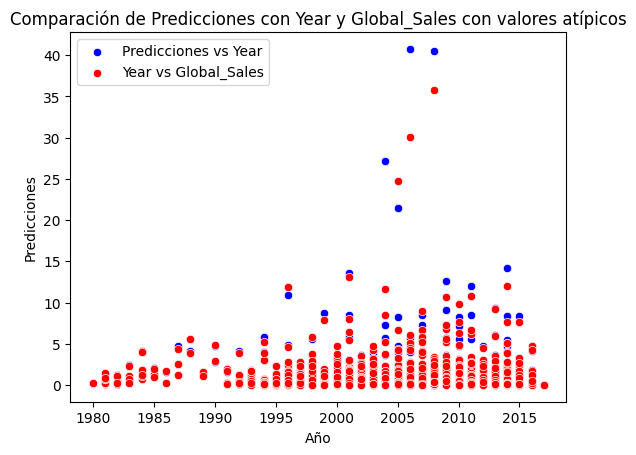

In [ ]:
# Graficar las Predicciones comparando las variables Year vs Global_Sales del segundo modelo con valores atipicos

# Graficar Year vs Predicciones
sns.scatterplot(x = X_2_test['Year'], y = y_2_pred, label='Predicciones vs Year', color='blue')

# Graficar Year vs Global_Sales
sns.scatterplot(x = X_2_test['Year'], y = y_2_test, label='Year vs Global_Sales', color='red')

# Añadir etiquetas y título
plt.title('Comparación de Predicciones con Year y Global_Sales con valores atípicos')
plt.xlabel('Año')
plt.ylabel('Predicciones')
plt.legend()

# Mostrar el gráfico
plt.show()

### Se gráfican las predicciones comparando las variables Rank vs Global_Sales

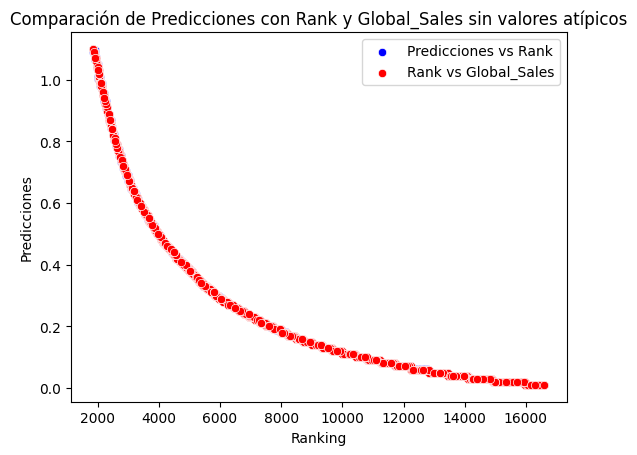

In [ ]:
# Graficar las Predicciones comparando las variables Rank vs Global_Sales sin valores atipicos

# Graficar Rank vs Predicciones
sns.scatterplot(x = X_test['Rank'], y = y_pred, label='Predicciones vs Rank', color='blue')

# Graficar Rank vs Global_Sales
sns.scatterplot(x = X_test['Rank'], y = y_test, label='Rank vs Global_Sales', color='red')

# Añadir etiquetas y título
plt.title('Comparación de Predicciones con Rank y Global_Sales sin valores atípicos')
plt.xlabel('Ranking')
plt.ylabel('Predicciones')
plt.legend()

# Mostrar el gráfico
plt.show()

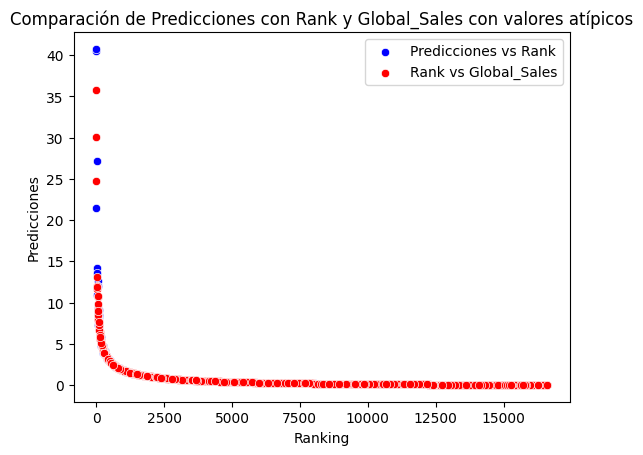

In [ ]:
# Graficar las Predicciones comparando las variables Rank vs Global_Sales del segundo modelo con valores atipicos

# Graficar Rank vs Predicciones
sns.scatterplot(x = X_2_test['Rank'], y = y_2_pred, label='Predicciones vs Rank', color='blue')

# Graficar Rank vs Global_Sales
sns.scatterplot(x = X_2_test['Rank'], y = y_2_test, label='Rank vs Global_Sales', color='red')

# Añadir etiquetas y título
plt.title('Comparación de Predicciones con Rank y Global_Sales con valores atípicos')
plt.xlabel('Ranking')
plt.ylabel('Predicciones')
plt.legend()

# Mostrar el gráfico
plt.show()

## Evaluación de los modelos

In [ ]:
# Evaluar el modelo

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 0.00


In [ ]:
# Evaluar el segundo modelo

mse_2 = mean_squared_error(y_2_test, y_2_pred)
print(f"Mean Squared Error: {mse_2:.2f}")

Mean Squared Error: 0.13


## Comentarios finales

### Análisis Final

Una vez definido y entrenado los modelos, obtuvimos que el valor del Error cuadrático medio de ambos modelos es cercano a 0, por lo que el modelo es muy preciso de acuerdo con los datos de los dataframes 'df_2' y 'df_final' utilizados en los modelos de predicción.

### Conclusiones

Desarrollar este modelo de predicción ha sido importante ya que me permitió conocer un estimado en las ventas de videojuegos en las diferentes regiones del mundo utilizando el dataset inicial, el cual se tuvo que ajustar para que fuese ideal en la definición, entrenamiento y evaluación de los modelos desarrollados.

En cuanto al curso, ha sido muy satisfactorio conocer las diferentes metodologías que existen para el desarrollo de diversas herramientas y modelos utilizando los conceptos de la inteligencia artificial.

# Muchas gracias!!!